# Lab 1 - Statistical Distributions

##### PHYS434 - Advanced Laboratory: Computational Data Analysis
##### Professor: Miguel Morales
<br>

##### Due date: 10/11/2021
##### By Erik Solhaug
<br>

This lab will focus on statistical distributions including both continuous and non-continuous distributions. We will also cover the use and conversion of probabilities to 'sigma'. 

In [1]:
# Importing needed libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# This sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)
# This sets the fontsize of the x- and y-labels
fsize = 30

## A Little Statistics

## 1.

We will start by looking at how we can convert a probability into a **'sigma'** ($\mathbf{\sigma}$). In physics, sigma is used to report probabilities, and a probability may thus be described in terms of a number of sigma.

First, we explore how we can calculate the 'sigma' value corresponding to a given **probability**. The probability in the data distributions we are working with is the integral under the curve of the data distributions (since these are probability densities). The sigma implicitly refers to the _standard normal distribution_ (a Gaussian with mean zero and standard deviation of one).

## A)

I have read about the standard normal distribution and z-tables which are essentially tables that help us connect a value of sigma with the integral under the curve of the normal distribution from negative infinity up to that value of sigma. This, as we will see, becomes an important way to understand sigma values and the probabilities associated with them.

## B)

We now move on to checking that we can easily calculate the integral under the distribution by using the error function (sometimes seen as erfc()), which in this case is called by using stats.norm.cdf(x) where x is the value of sigma (standard deviations) away from the center of the distribution. This function yields the area under the curve of the standard normal distribution left of the value 'x' which corresponds to a probability. Thus, this probability is mapped to a 'sigma', and measurements are often referred to by their sigmas rather than their probabilities. One can use the z-table to find the values of the cdf (cumulative distribution function) of a value - then, for any value 'x' there will be a z-score in the z-table that corresponds to the integral from negative infinity up to the value 'x' under the standard normal distribution.

Below, we check that we get values corresponding to those in the Standard Normal Table (z-table) when using the cdf.

In [2]:
stats.norm.cdf(0)

0.5

We check the values with the z scores in the Standard Normal table (https://en.wikipedia.org/wiki/Standard_normal_table):

<img src="./images/ztable1.png" width=400 height=400 /> <img src="./images/ztable2.png" width=400 height=400 />

	0.50000

In [3]:
stats.norm.cdf(0.1)

0.539827837277029

	0.53983

In [4]:
stats.norm.cdf(-0.1)

0.460172162722971

	0.46017

In [5]:
stats.norm.cdf(0.5)

0.6914624612740131

	0.69146

In [6]:
stats.norm.cdf(-0.5)

0.3085375387259869

	0.30854

In [7]:
stats.norm.cdf(2)

0.9772498680518208

	0.97725

In [8]:
stats.norm.cdf(-2)

0.022750131948179195

	0.02275

We see that these values all match the z scores from the Standard Normal table as expected.

## C)

Here, we explore the **inverse** of the integral of the normal distribution - the _percent point function_, or stats.norm.ppf().

Often, we want to use this inverse to determine the 'sigma' for a given probability. We attempt several probabilities we know the value of below.

In [9]:
stats.norm.cdf(1)

0.8413447460685429

The cdf of 1 sigma yields the value 0.84 (which we have found by using stats.norm.cdf above).
Since our integration under the standard distribution goes from negative infinity to 1 sigma, we would need to subtract (1-P) from P to get the probability of 1 sigma - thus removing the contributions from the 'wings' of the integral under the standard distribution.

$P(1\sigma) = 0.84 - (1-0.84) = 0.68$

We need to plug in the value 0.84 into our function since we want to do the inverse of the integral including the area under the standard distribution on the left 'wing' of the distribution.

In [10]:
stats.norm.ppf(0.84)

0.994457883209753

In [11]:
stats.norm.ppf(0.16)

-0.994457883209753

From the Lecture #1 notes:

5 sigma = 2.87e-7 
(f.ex. for the probability of signal being produced from background noise).

In [12]:
stats.norm.ppf(2.87e-7)

-4.999765776842555

In [13]:
stats.norm.ppf(1-2.87e-7)

4.9997657768508095

2 sigma = 0.954

In [14]:
stats.norm.ppf(.977)

1.9953933101678245

In [15]:
stats.norm.ppf(0.023)

-1.9953933101678247

## D)

Now, why does a **minus sign** appear in some of the outputs above?

When integrating over a standard normal distribution (standard Gaussian), we integrate from negative infinity up to the value x in stats.norm.cdf(x). Thus, we integrate from left up to the value, and this yields the probability that is under the probability density curve (our distribution) up to that value - remembering that since this is a standard normal distribution, this value is in terms of 'sigma'. Since the mean of the standard distribution is at 0 sigma, a positive sigma indicates the probability we have found through the integration is left of the value and will be larger than 0.5. If the sigma-value is negative, we have also integrated left of the sigma-value, but now **the probability is less than 0.5**. If we want to find the positive sigma-value, we can simply do stats.norm.ppf of one minus that same probability-value since the standard distribution is symmetric.

## 2.

Now, we will move on to look at some other continuous analytic distributions that are not Gaussian. We will essentially use a similar procedure as in part **1.** to plot the distributions. We will change its parameters to get a sense of its general properties. We make sure to initialize the distribution with at least 100,000 realizations.

## A)

There are many other continuous distributions: Rayleigh, Lognormal, Chi-Squared (or Gamma) and Exponential are some of them. I have picked the **Lognormal** distribution and will focus on this specific distribution for this portion of the lab.

## B)

We produce a Lognormal distribution using scipy: size = 100k and vary the parameter s (the "shape parameter").

In [16]:
s = 1
d = stats.lognorm.rvs(s, size = 100000)

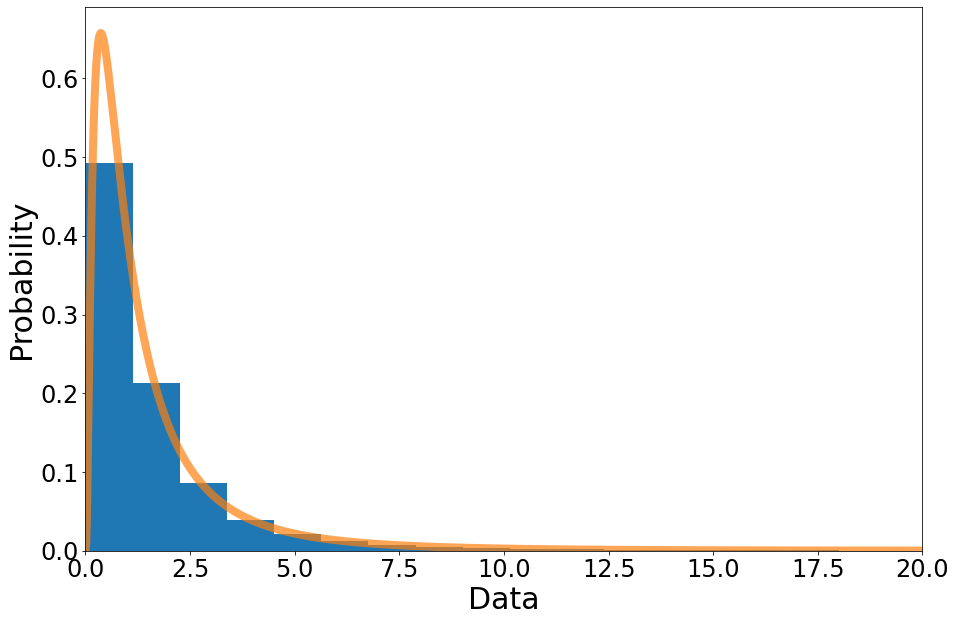

In [17]:
fig, ax = plt.subplots(1, 1)
ax.hist(d, 50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([0,20])
x = np.linspace(0,20,1000)
ax.plot(x,stats.lognorm.pdf(x, s),linewidth = 8,alpha = 0.7)
ax.set_xlabel('Data', fontsize = fsize)
ax.set_ylabel('Probability', fontsize = fsize)
plt.show()

As we can see by comparing the plots above and below, changing the s parameter in the LogNormal distribution. This changes the shape of the distribution. A smaller s ("shape parameter") makes for a more densely packed distribution with little deviation, while a higher s yields a distribution that is flatter with more deviation.

In [18]:
s = .7
d = stats.lognorm.rvs(s, size = 100000)

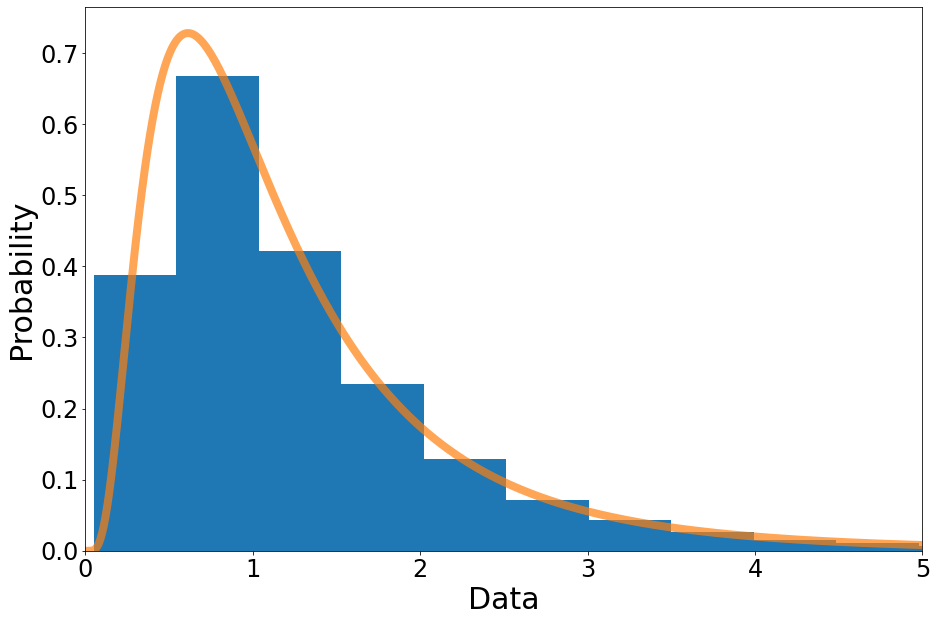

In [19]:
fig, ax = plt.subplots(1, 1)
ax.hist(d, 50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([0,5])
x = np.linspace(0,5,1000)
ax.plot(x,stats.lognorm.pdf(x, s),linewidth = 8,alpha = 0.7)
ax.set_xlabel('Data', fontsize = fsize)
ax.set_ylabel('Probability', fontsize = fsize)
plt.show()

In [20]:
s = .5
d = stats.lognorm.rvs(s, size = 100000)

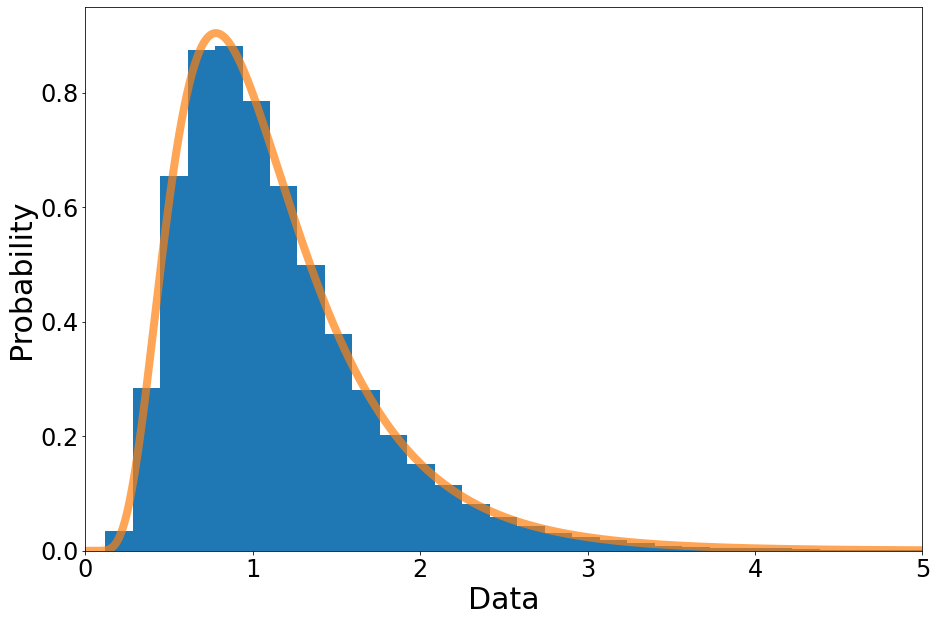

In [21]:
fig, ax = plt.subplots(1, 1)
ax.hist(d, 50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([0,5])
x = np.linspace(0,5,1000)
ax.plot(x,stats.lognorm.pdf(x, s),linewidth = 8,alpha = 0.7)
ax.set_xlabel('Data', fontsize = fsize)
ax.set_ylabel('Probability', fontsize = fsize)
plt.show()

In [22]:
s = .1
d = stats.lognorm.rvs(s, size = 100000)

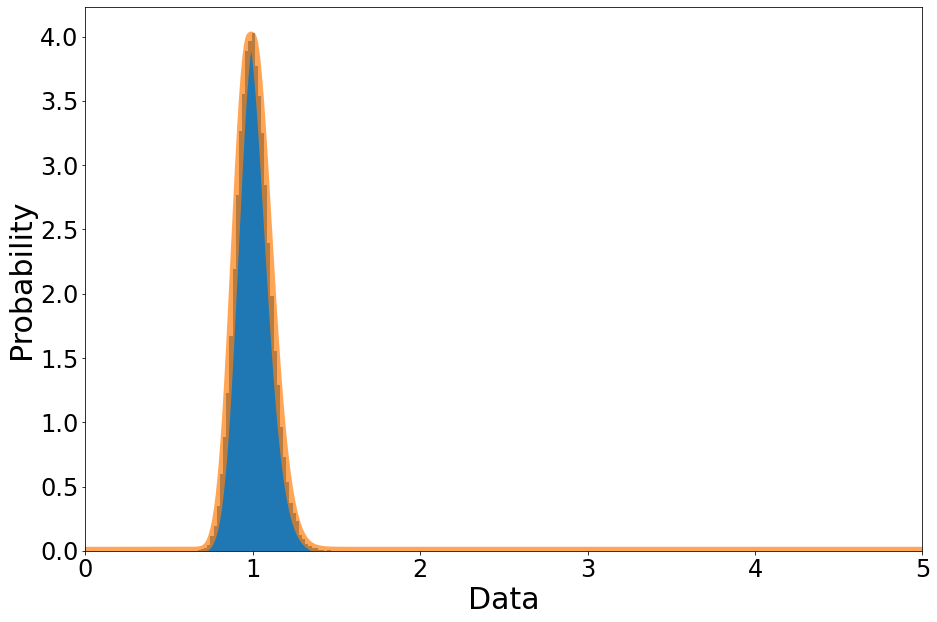

In [23]:
fig, ax = plt.subplots(1, 1)
ax.hist(d, 50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([0,5])
x = np.linspace(0,5,1000)
ax.plot(x,stats.lognorm.pdf(x, s),linewidth = 8,alpha = 0.7)
ax.set_xlabel('Data', fontsize = fsize)
ax.set_ylabel('Probability', fontsize = fsize)
plt.show()

In [24]:
s = 1.1
d = stats.lognorm.rvs(s, size = 100000)

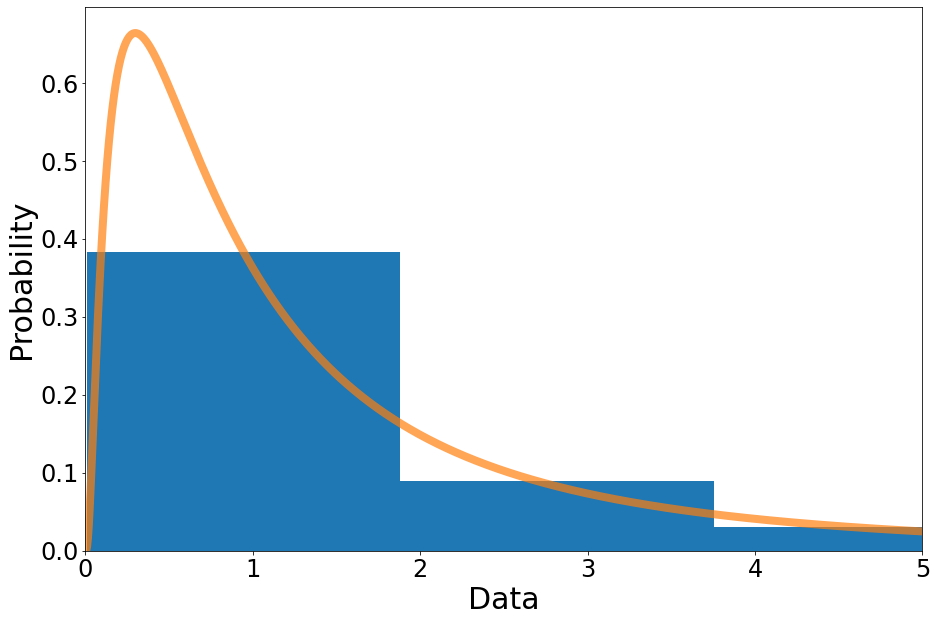

In [25]:
fig, ax = plt.subplots(1, 1)
ax.hist(d, 50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([0,5])
x = np.linspace(0,5,1000)
ax.plot(x,stats.lognorm.pdf(x, s),linewidth = 8,alpha = 0.7)
ax.set_xlabel('Data', fontsize = fsize)
ax.set_ylabel('Probability', fontsize = fsize)
plt.show()

ASIDE: Out of curiosity, I tested to see what a **chi-squared** distribution looks like.

In [26]:
d = stats.chi2.rvs(df=50, size=100000)

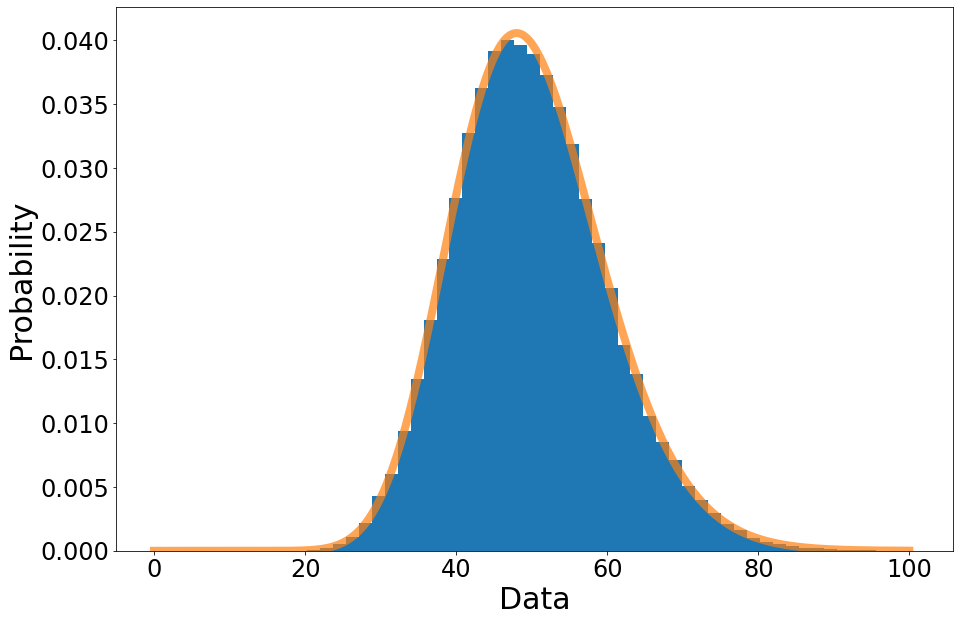

In [27]:
fig, ax = plt.subplots(1, 1)
ax.hist(d, 50, density=True)
plt.tick_params(labelsize = 24)
#plt.xlim([0,20])
x = np.linspace(0,100,1000)
ax.plot(x, stats.chi2.pdf(x, df=50),linewidth = 8,alpha = 0.7)
ax.set_xlabel('Data', fontsize = fsize)
ax.set_ylabel('Probability', fontsize = fsize)
plt.show()

## 3.

Let's now imagine that our signal-free data follows the distribution we picked, and we have a measurement for which we need to determine the 'sigma'. Given this hypothetical measurement, we figure out the 'sigma' of this measurement below.

## A)

I will be using the Lognormal distribution with the parameters defined below (s=0.7) since this visibly looked the best.
Let's select a hypothetically measured value of **2.5**.

In [28]:
s = .7
d = stats.lognorm.rvs(s, size = 100000)

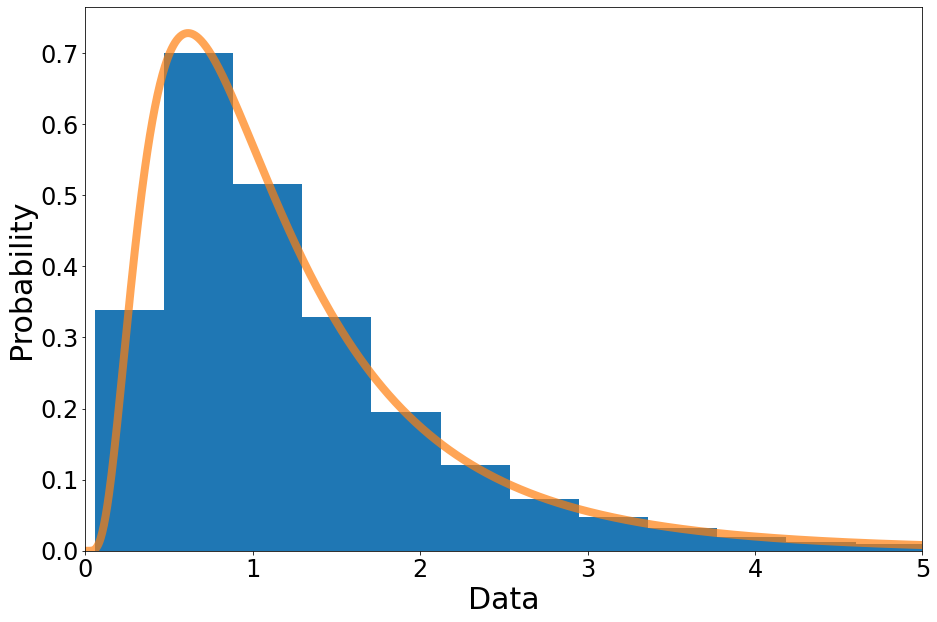

In [29]:
fig, ax = plt.subplots(1, 1)
ax.hist(d, 50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([0,5])
x = np.linspace(0,5,1000)
ax.plot(x,stats.lognorm.pdf(x, s),linewidth = 8,alpha = 0.7)
ax.set_xlabel('Data', fontsize = fsize)
ax.set_ylabel('Probability', fontsize = fsize)
plt.show()

## B)

Now that I have picked the value 2.5 for my hypothetical measurement, we can say that some measurement at the value 2.5 can have been caused by the "background noise" and not by an actual signal. We then want to know how large the probability is that the measurement was just caused by fluctuations coming from the background. For our measurement at the value 2.5 there is some integrated probability right of this value that corresponds to the a sigma in a standard normal distribution. Then, our statistical question becomes:

**What is the sigma for which the integrated probability under a standard normal distribution right of this sigma is equal to the probability one gets by integrating right of the value 2.5 in our data-distribution?**

## C)

We now convert our word question into a mathematical integral. Our data distribution is referred to as f(x) while the standard normal distribution is s(x). Then, we refer to the x-axis in both cases as x.

The probability of the measurement being caused by the background is:

$$\mathcal{P(2.5)} = \int_{2.5}^{\infty} \! f(x) \, \mathrm{d}x$$

And if you want to find sigma:

$$\int_{\sigma}^{\infty} \! s(x) \, \mathrm{d}x = \int_{2.5}^{\infty} \! f(x) \, \mathrm{d}x$$

Or alternatively,

$$1 - \int_{-\infty}^{-\sigma} \! s(x) \, \mathrm{d}x = \int_{2.5}^{\infty} \! f(x) \, \mathrm{d}x$$

## D)

We then use the scipy math functions to calculate the probability that the background produced the signal.

In [30]:
s = 0.7
prob_datadistribution = 1 - stats.lognorm.cdf(2.5, s)
prob_datadistribution

0.09526941785499088

In [31]:
print(f'The probability of the background producing this signal is {prob_datadistribution:.3f}.')

The probability of the background producing this signal is 0.095.


## E)

And, let's convert our probability into an equivalent 'sigma' value.

In [32]:
sigma = stats.norm.ppf(1-prob_datadistribution)
sigma

1.3089867598202218

In [33]:
print(f'The sigma corresponding to this probability is {sigma:.1f}.')

The sigma corresponding to this probability is 1.3.


## 4.

Now, let's explore a little bit. Below, we try various hypothetical measurement values to see how the probabilities and 'sigmas' change.

We see that as we choose a higher value where the probability density becomes lower, the value of sigma becomes higher as the probability of that measurement being caused by the background decreases. We try to make it clear what our changing measurement value is by assigning it the variable name 'x'.

In [34]:
x = 3
stats.norm.ppf(1-(1 - stats.lognorm.cdf(x, s)))

1.5694461266687276

In [35]:
x = 5
stats.norm.ppf(1-(1 - stats.lognorm.cdf(x, s)))

2.2991970177629995

In [36]:
x = 10
stats.norm.ppf(1-(1 - stats.lognorm.cdf(x, s)))

3.289407275705788

We can tell that when the measurement value is 1, sigma is 0. Thus, 1 is our mean value (which happens to be the default mean of the distribution according to scipy's documentation).

In [37]:
x = 1
stats.norm.ppf(1-(1 - stats.lognorm.cdf(x, s)))

0.0

And, as expected, when we have a measurement value lower than (or left of) the mean, we get a sigma that is negative (and thus left of 0 on a standard normal distribution).

In [38]:
x = 0.5
stats.norm.ppf(1-(1 - stats.lognorm.cdf(x, s)))

-0.9902102579427795

## Non-Continuous Distributions

## 1.

In this last part of the lab, we will look at non-continuous distributions and see how we can calculate probabilities and sigmas from these.

## A)

There are two main non-continuous distributions: Binomial and Poisson. I have chosen the **Poisson** distribution.

## B)

Let's make a series of plots with different parameters to see if we can look more into the features of the Poisson distribution.

In the plots below, I focus on varying 'mu' ($\mu$) which is the expected outcome of occurrences for the Poisson distribution - in most cases, the distribution will be centered around this value, except for example when mu=0.9 (which has to do with how each realization of the discrete values contributes to the mean).

In [39]:
mu = 5

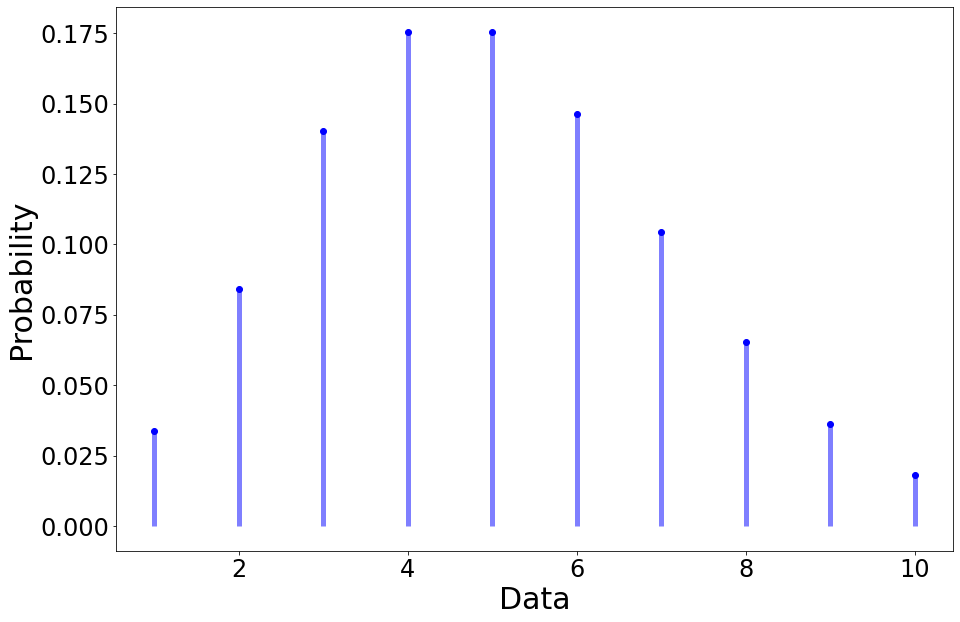

In [40]:
fig, ax = plt.subplots(1, 1)
x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.99, mu))
plt.tick_params(labelsize = 24)
ax.plot(x, stats.poisson.pmf(x, mu), 'bo')
ax.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
ax.set_xlabel('Data', fontsize = fsize)
ax.set_ylabel('Probability', fontsize = fsize)
plt.show()

In [41]:
mu = 1

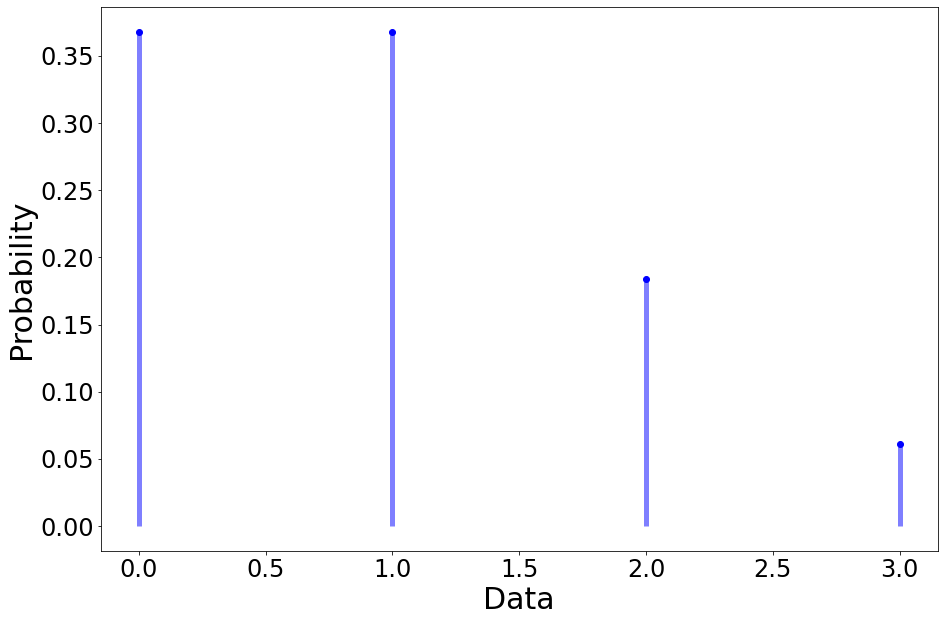

In [42]:
fig, ax = plt.subplots(1, 1)
x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.99, mu))
plt.tick_params(labelsize = 24)
ax.plot(x, stats.poisson.pmf(x, mu), 'bo')
ax.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
ax.set_xlabel('Data', fontsize = fsize)
ax.set_ylabel('Probability', fontsize = fsize)
plt.show()

In [43]:
mu = 0.9

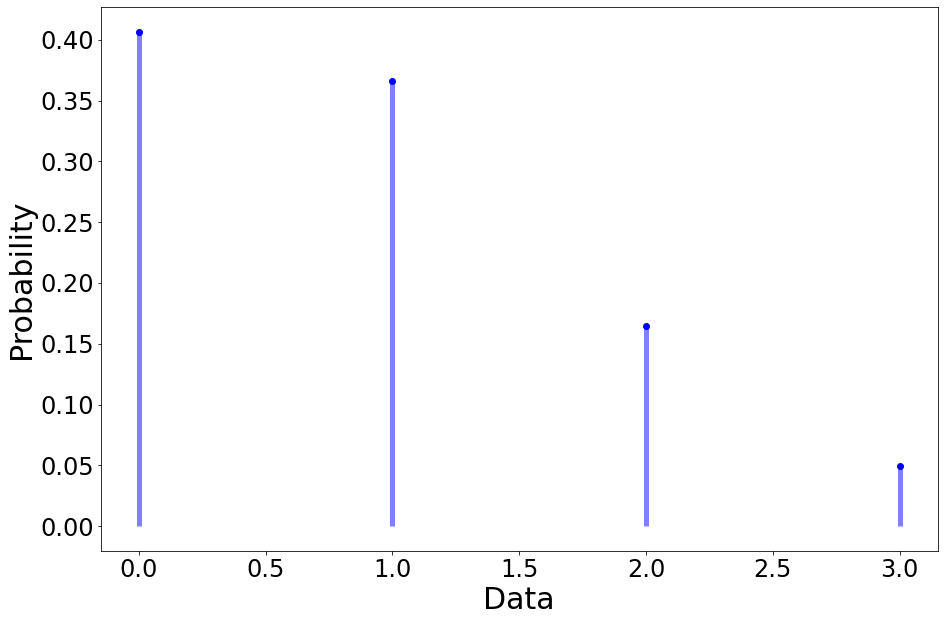

In [44]:
fig, ax = plt.subplots(1, 1)
x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.99, mu))
plt.tick_params(labelsize = 24)
ax.plot(x, stats.poisson.pmf(x, mu), 'bo')
ax.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
ax.set_xlabel('Data', fontsize = fsize)
ax.set_ylabel('Probability', fontsize = fsize)
plt.show()

In [45]:
mu = 10

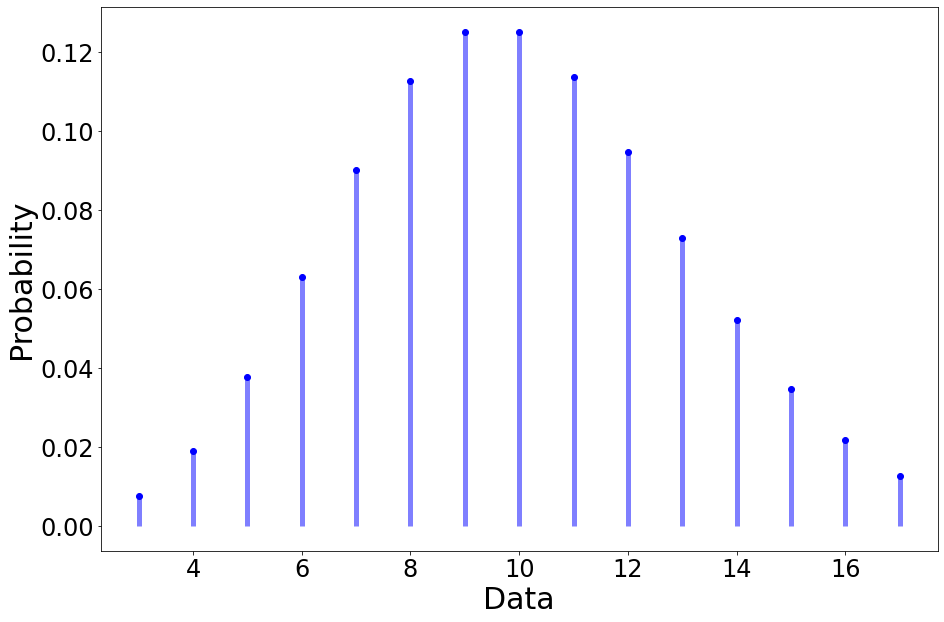

In [46]:
fig, ax = plt.subplots(1, 1)
x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.99, mu))
plt.tick_params(labelsize = 24)
ax.plot(x, stats.poisson.pmf(x, mu), 'bo')
ax.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
ax.set_xlabel('Data', fontsize = fsize)
ax.set_ylabel('Probability', fontsize = fsize)
plt.show()

When you increase mu (the expected rate of occurrences), the distribution seems to become Gaussian-like.

In [47]:
mu = 100

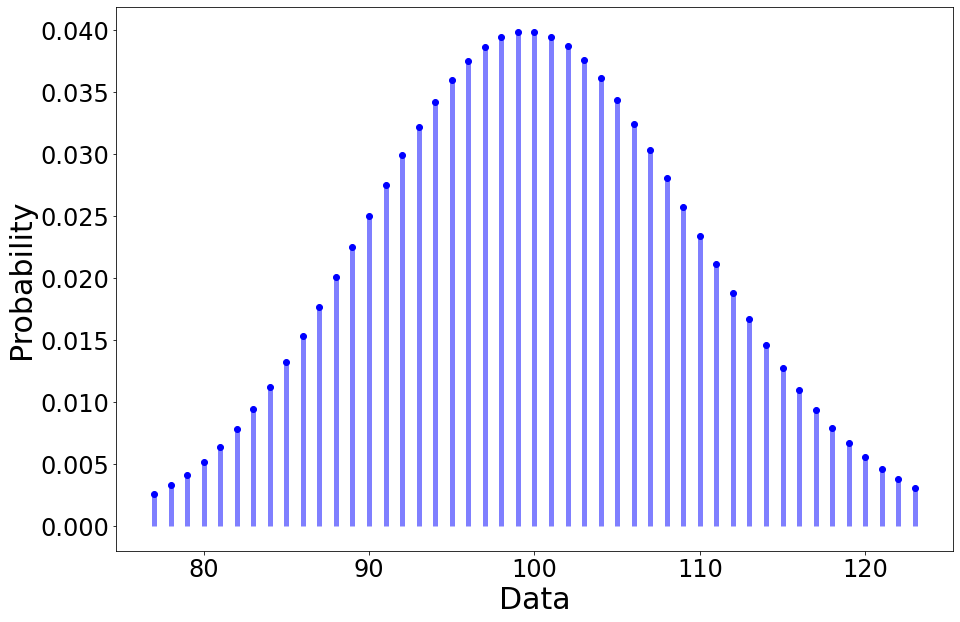

In [48]:
fig, ax = plt.subplots(1, 1)
x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.99, mu))
plt.tick_params(labelsize = 24)
ax.plot(x, stats.poisson.pmf(x, mu), 'bo')
ax.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
ax.set_xlabel('Data', fontsize = fsize)
ax.set_ylabel('Probability', fontsize = fsize)
plt.show()

And we can in fact look closer at this by plotting the distribution on a semilog plot.

If in fact, the distribution approaches a sort of Gaussian shape then when plotting the y-axis in log one would expect to see a parabolic shape...

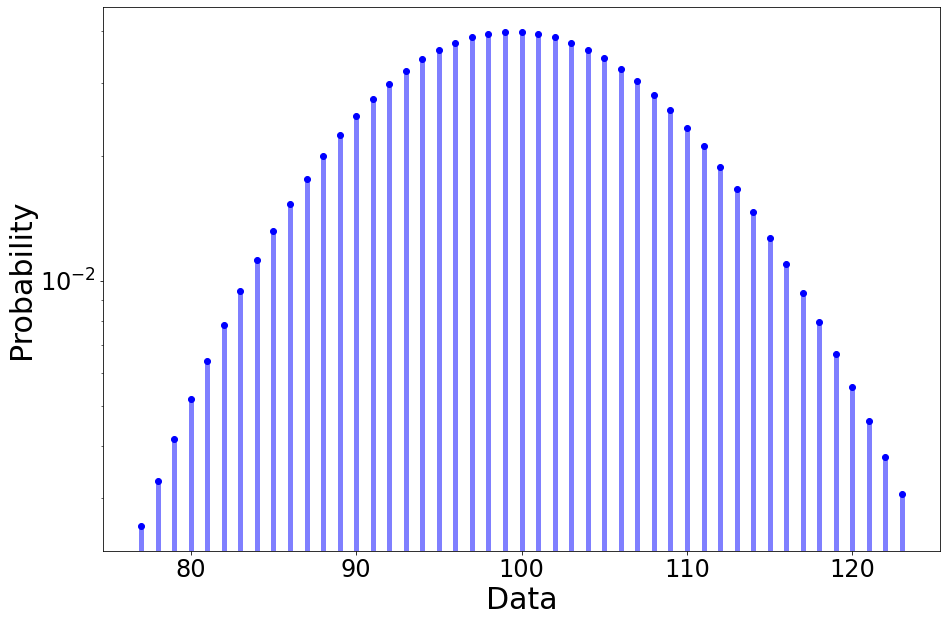

In [49]:
fig, ax = plt.subplots(1, 1)
x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.99, mu))
plt.tick_params(labelsize = 24)
ax.plot(x, stats.poisson.pmf(x, mu), 'bo')
ax.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
ax.set_xlabel('Data', fontsize = fsize)
ax.set_ylabel('Probability', fontsize = fsize)
ax.set_yscale('log')
plt.show()

...which is what we appear to see here. Thus, as mu becomes very large, the distribution appears Gaussian (although it is discrete in nature - not continuous).

## C)

We again simulate a hypothetical question with a probability corresponding to it. This will eventually be calculated in terms of 'sigma' as done below.

I will be using the plot below in my calculations, and I choose to evaluate the probability at the measurement value **8**.

In [50]:
mu = 5

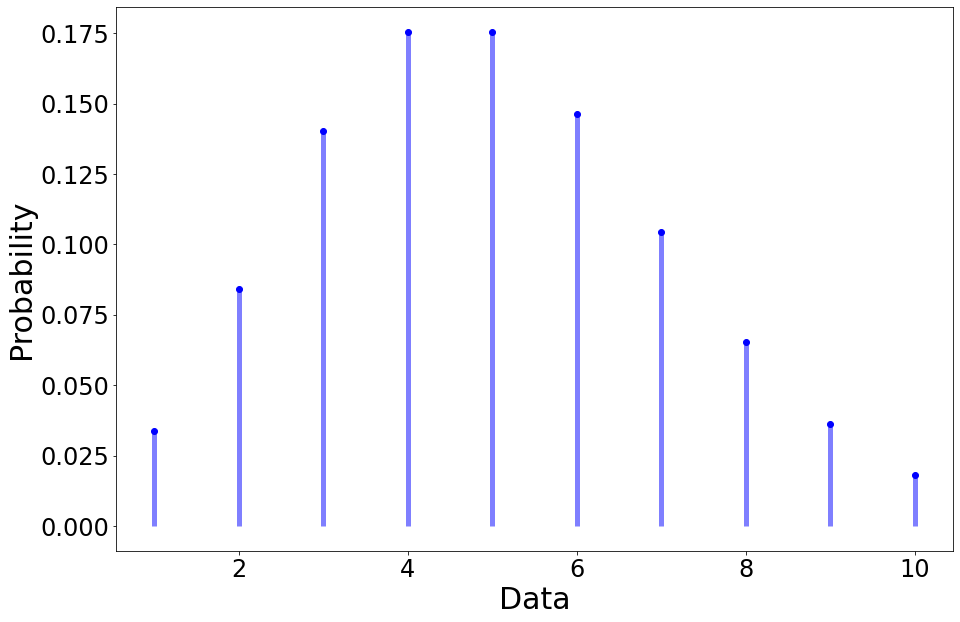

In [51]:
fig, ax = plt.subplots(1, 1)
x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.99, mu))
plt.tick_params(labelsize = 24)
ax.plot(x, stats.poisson.pmf(x, mu), 'bo')
ax.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
ax.set_xlabel('Data', fontsize = fsize)
ax.set_ylabel('Probability', fontsize = fsize)
plt.show()

Our distribution will show the rate of occurrences during a certain time interval (could be for example the expected number of incoming calls to a call center per hour).

Thus, our question becomes:
What is the probability that we measure some event happen at least 8 times during this time interval?

Remember, since we are integrating - or in this discrete case summing - over the values left of the hypothetically measured value we need to subtract the probability we get from 1.

In [52]:
x = 8
prob_poisson = 1 - stats.poisson.cdf(x, mu)
prob_poisson

0.06809363472184837

In [53]:
print(f'The probability that the event happens at least 8 times is {prob_poisson:.3f}')

The probability that the event happens at least 8 times is 0.068


We find the sigma the same way as previously:

In [54]:
sigma_poisson = stats.norm.ppf(1-prob_poisson)
sigma_poisson

1.4901406054758806

In [55]:
print(f'The sigma corresponding to this probability is {sigma_poisson:.1f}')

The sigma corresponding to this probability is 1.5


## D)

So what implications does the fact that our distribution, its probabilities and 'sigmas' are **discrete** have for our experiments?

Now that our distribution is discrete, we essentially end up summing over each discrete value on the x-axis of our distribution (1, 2, 3,...). This is different from previously when we integrated over a continuous distribution. Thus, the physically measurements one can make are limited to only discrete values and the 'array' of probabilities corresponding to these measureable values are on discrete intervals.

## E)

While the results are discrete, the parameters of the distributions are **not**. For example, the mean of a Poisson distribution can be 9.2. Why does this makes sense? What changes continuously and what doesn't?

Although the distribution and the probabilities are discrete, it still makes sense that the sigmas can be some non-integer number. This is because even though our data distribution is discrete in nature, we still report our value in sigmas by integrating under a **continuous** distribution, namely the standard normal distribution. This will give us any sigma that corresponds to the probability we got from summing over the discrete distribution. The values for measurements of f.ex. 6, 7 or 8 in our distribution will have discrete intervals between their corresponding probabilities, simply because they correspond to discrete physical parameters - however, there is nothing standing in our way of getting a probability (a 'sigma') that has some decimal value. For example, given our probability above of 0.068, we "inverse-integrate" over the standard distribution and get a sigma of about 1.5.

Hence, the possible measureable values in the discrete distribution do not change - they stay discrete - but we end up integrating over the continuous standard normal distribution.